# Algorithm to Predict FX Rates, using MultiLinear Regression

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import date
import financefunctions as ff
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

pairs = ['JMD/USD Buy', 'JMD/USD Sell', 'JMD/GBP Buy', 'JMD/GBP Sell', 'JMD/CAD Buy', 'JMD/CAD Sell']

def predict_fx():
    for i in range(6):
        data = ff.get_full_fx_rates()[i]
        X = data.drop('Exchange Rate', axis=1)
        y = data['Exchange Rate']

        len_of_data = len(data)

        len_of = int(round(len_of_data*0.85, 0))

        X_train = X[:len_of]
        y_train = y[:len_of]
        X_test = X[len_of:]
        y_test = y[len_of:]
        
        regressor = LinearRegression()
        
        regressor.fit(X_train, y_train)

        predicted = regressor.predict(X_test)
        results = pd.DataFrame({'Actual':y_test, 'Predicted':predicted})
        
        plt.figure(figsize=(16,8))
        plt.title(f'Prediction of {pairs[i]} FX Rate')
        y_test.plot()
        results['Predicted'].plot()
        plt.xlabel('Date')
        plt.ylabel('Price ($JMD)')
        plt.legend(['Actual','Test', 'Predicted'], loc='upper left')
        plt.show()
        
        print('*'*47)
        print(f"The accuracy of the {pairs[i]} model is: {round(regressor.score(X_test, y_test), 2)}")
        print('*'*47)
    

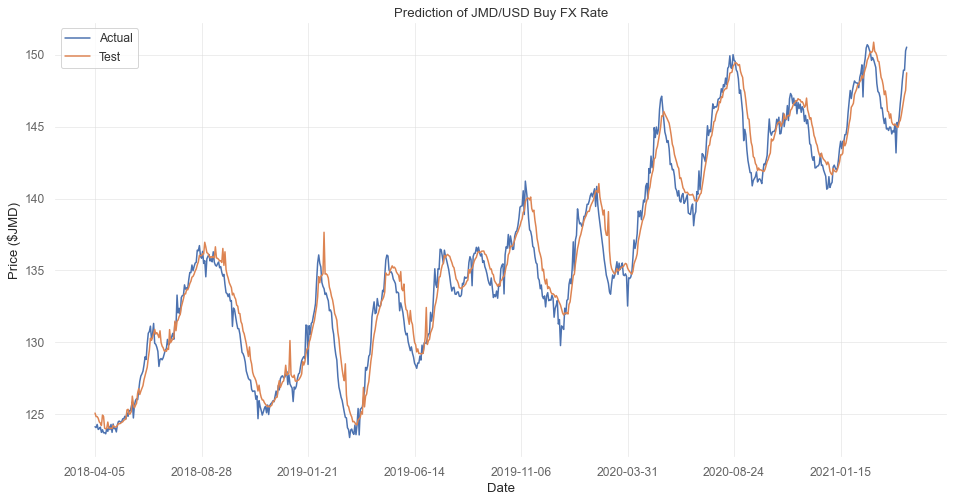

***********************************************
The accuracy of the JMD/USD Buy model is: 0.97
***********************************************


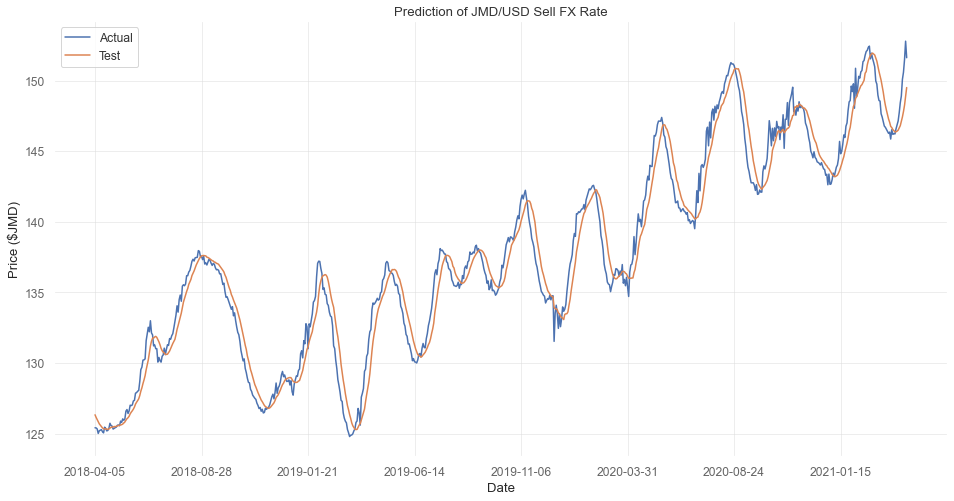

***********************************************
The accuracy of the JMD/USD Sell model is: 0.97
***********************************************


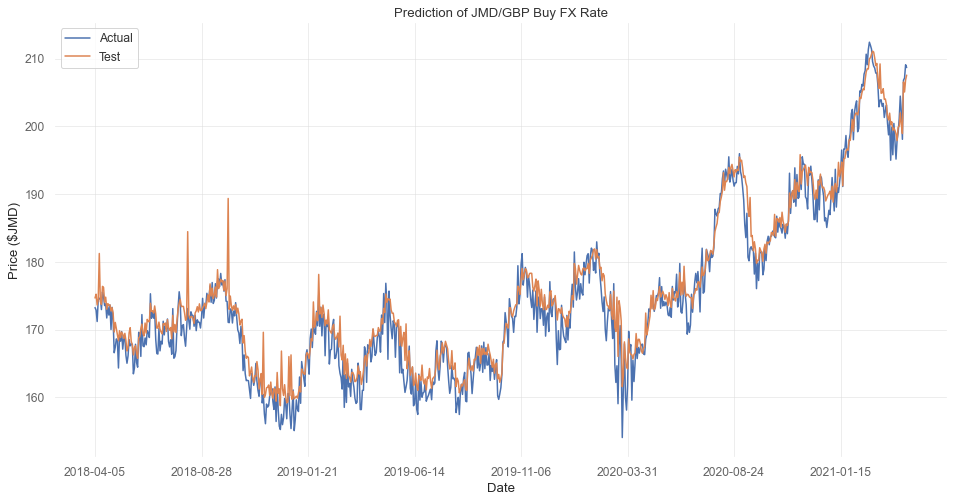

***********************************************
The accuracy of the JMD/GBP Buy model is: 0.96
***********************************************


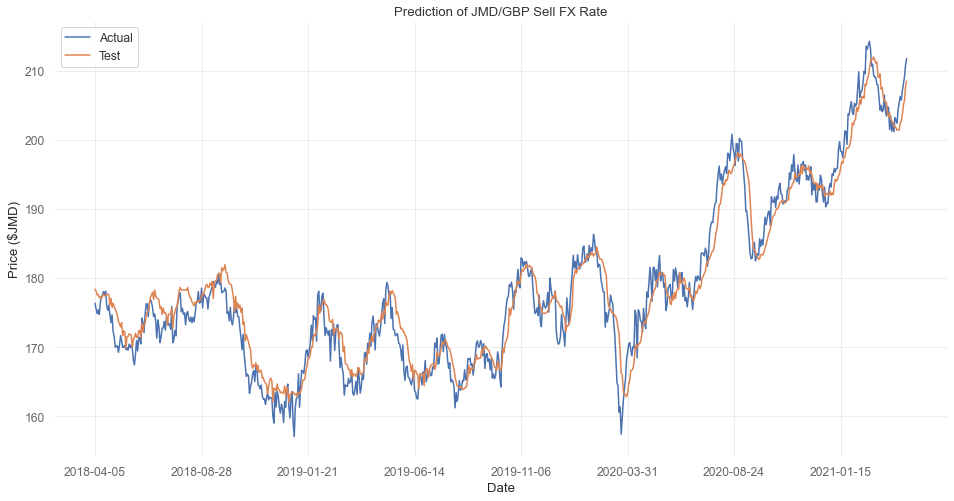

***********************************************
The accuracy of the JMD/GBP Sell model is: 0.95
***********************************************


In [ ]:
predict_fx()

# Prediction using Multiple Linear Regression and SMA (Simple Moving Average)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import date
import financefunctions as ff
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

pairs = ['JMD/USD Buy', 'JMD/USD Sell', 'JMD/GBP Buy', 'JMD/GBP Sell', 'JMD/CAD Buy', 'JMD/CAD Sell']

def predict_fx_sma(sma = 3):
    for i in range(6):
        data = ff.get_full_fx_rates()[i]
        
        data['Smooth'] = data['Exchange Rate']
        
        data[f'Smooth - {sma}SMA']= data['Smooth'].rolling(window=sma).mean()
        data = data.dropna(how='any')
        
        X = data.drop(data[['Smooth', f'Smooth - {sma}SMA', ]], axis=1)
        y = data[f'Smooth - {sma}SMA']
        
        len_of_data = len(data)

        len_of = int(round(len_of_data*0.85, 0))

        X_train = X[:len_of]
        y_train = y[:len_of]
        X_test = X[len_of:]
        y_test = y[len_of:]

        regressor = LinearRegression()

        regressor.fit(X_train, y_train)

        predicted = regressor.predict(X_test)
        results = pd.DataFrame({'Actual':y_test, 'Predicted':predicted})

        plt.figure(figsize=(16,8))
        plt.title(f'Prediction of {pairs[i]} FX Rate')
        data['Exchange Rate'][len_of:].plot()
        results['Predicted'].plot()
        plt.xlabel('Date')
        plt.ylabel('Price ($JMD)')
        plt.legend(['Actual','Test', 'Predicted'], loc='upper left')
        plt.show()
        
        print('*'*47)
        print(f"The accuracy of the {pairs[i]} model is: {round(regressor.score(X_test, data['Exchange Rate'][len_of:]), 2)}")
        print('*'*47)
    

        

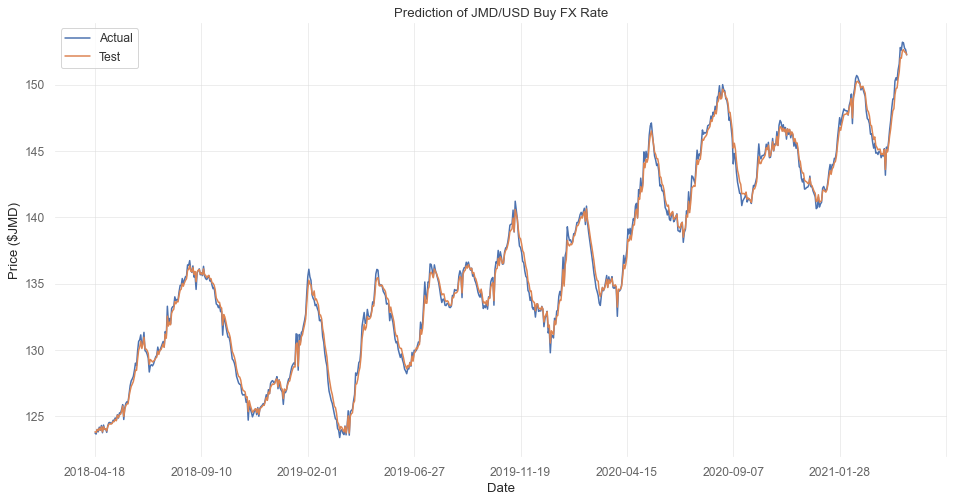

***********************************************
The accuracy of the JMD/USD Buy model is: 1.0
***********************************************


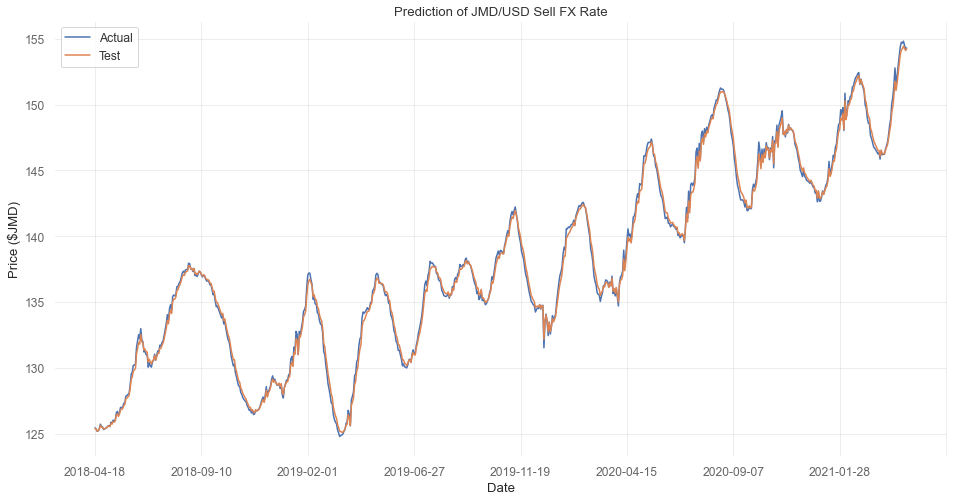

***********************************************
The accuracy of the JMD/USD Sell model is: 1.0
***********************************************


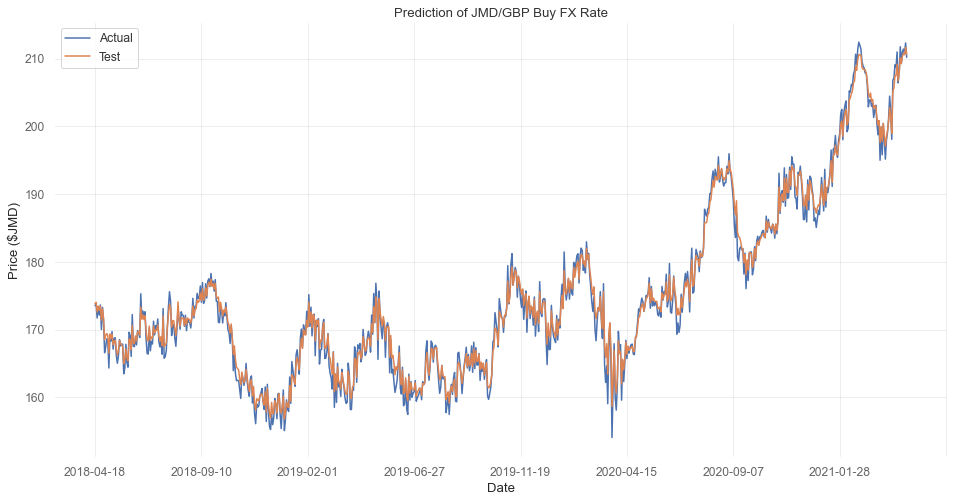

***********************************************
The accuracy of the JMD/GBP Buy model is: 0.99
***********************************************


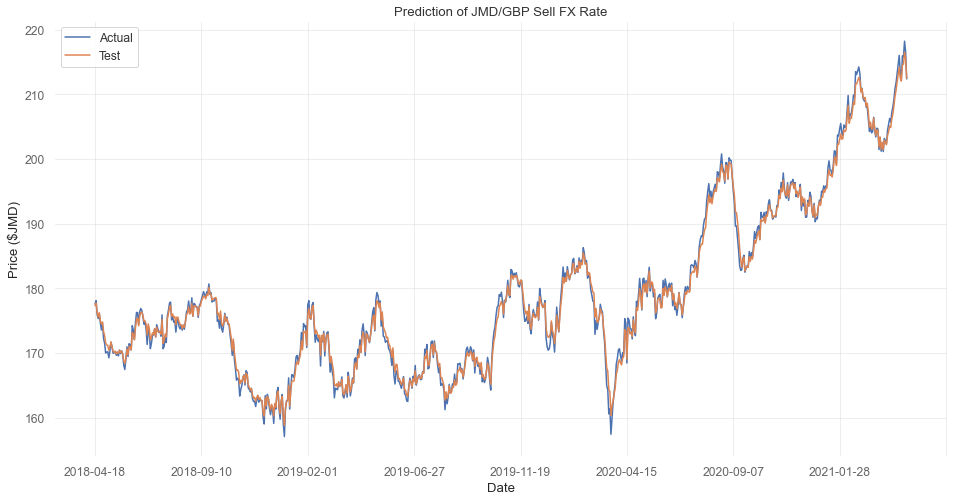

***********************************************
The accuracy of the JMD/GBP Sell model is: 1.0
***********************************************


In [ ]:
predict_fx_sma(sma = 3)

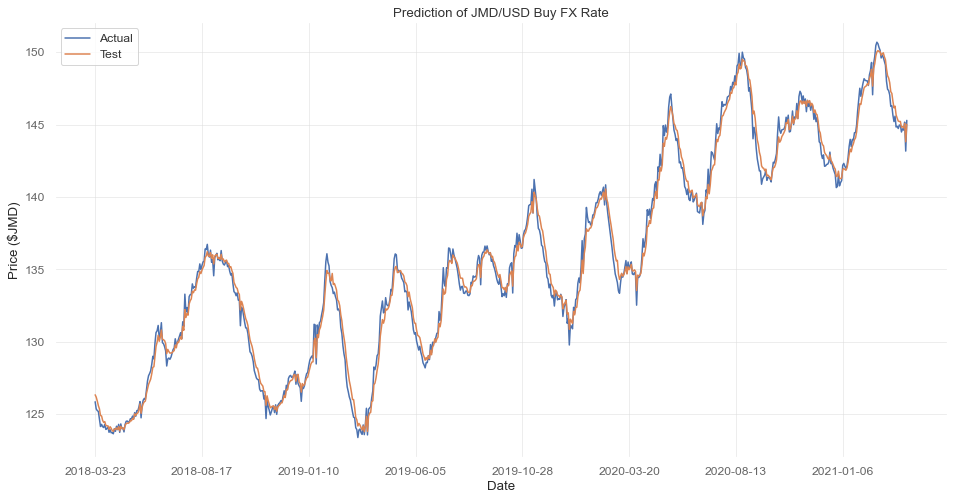

***********************************************
The accuracy of the JMD/USD Buy model is: 0.99
***********************************************


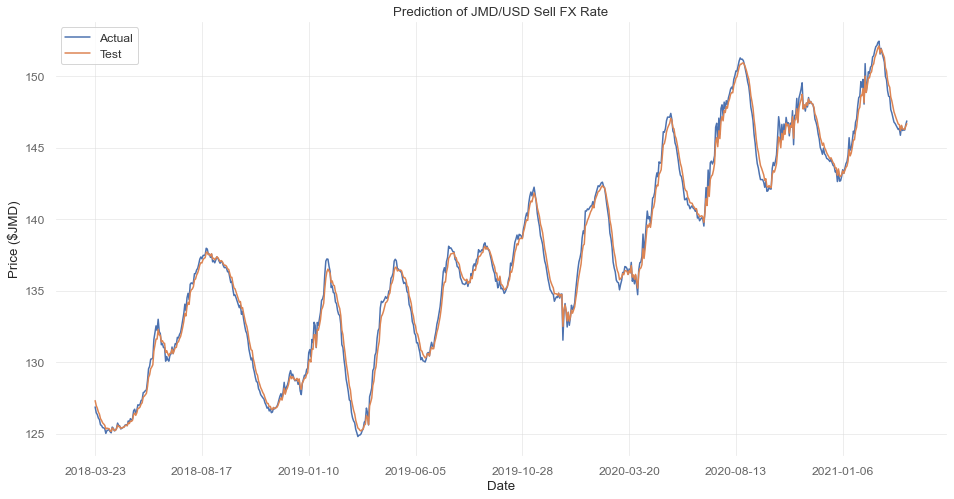

***********************************************
The accuracy of the JMD/USD Sell model is: 0.99
***********************************************


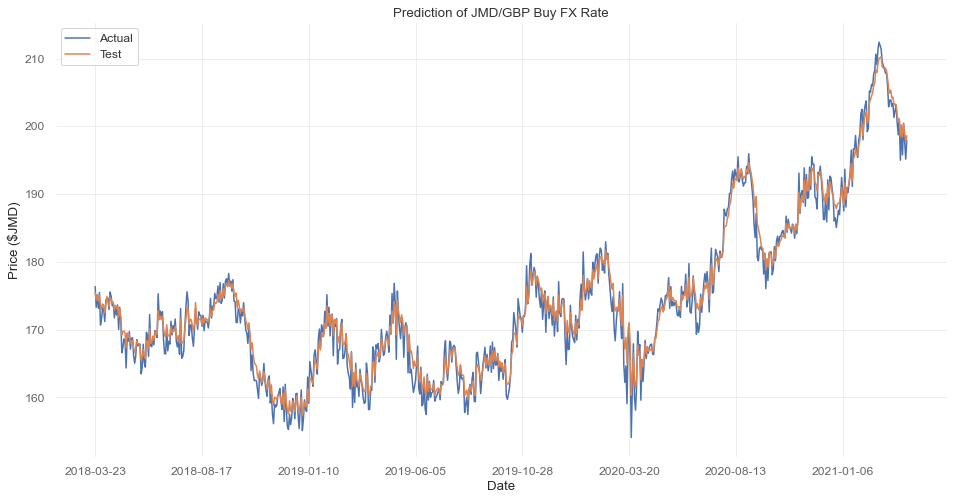

***********************************************
The accuracy of the JMD/GBP Buy model is: 0.98
***********************************************


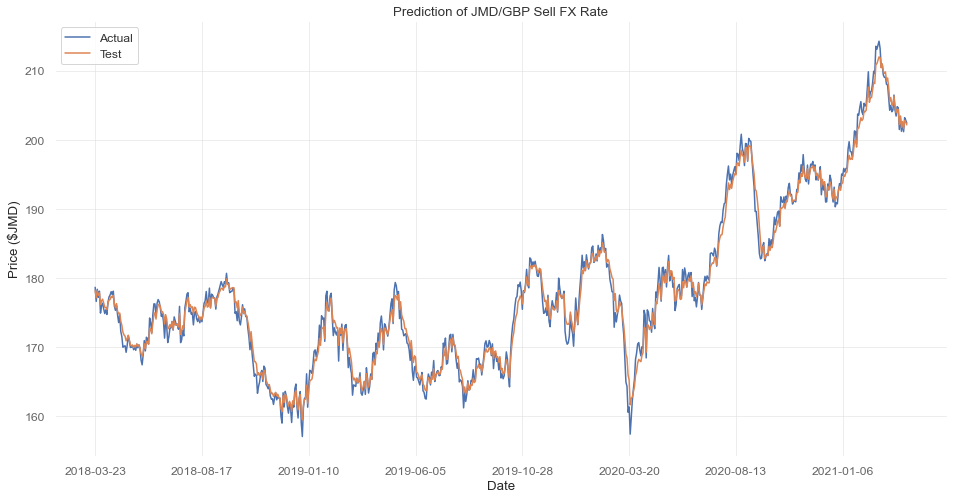

***********************************************
The accuracy of the JMD/GBP Sell model is: 0.99
***********************************************


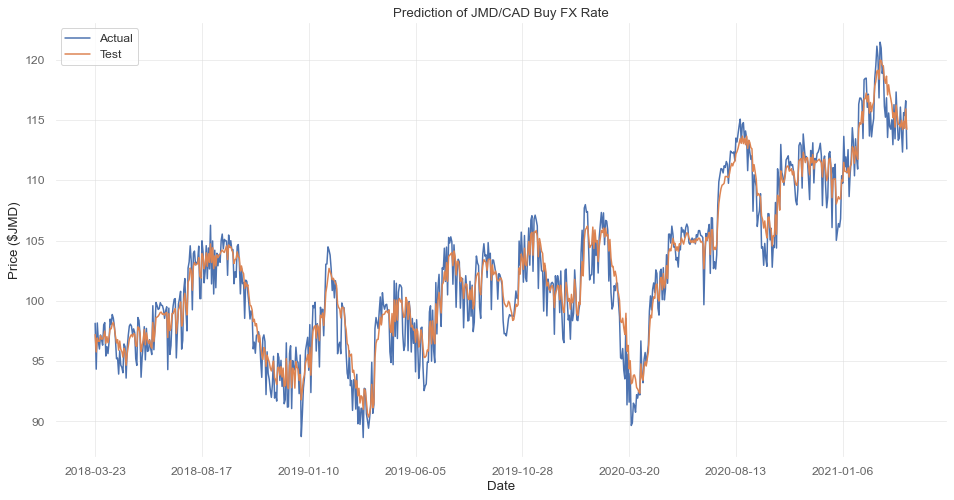

***********************************************
The accuracy of the JMD/CAD Buy model is: 0.96
***********************************************


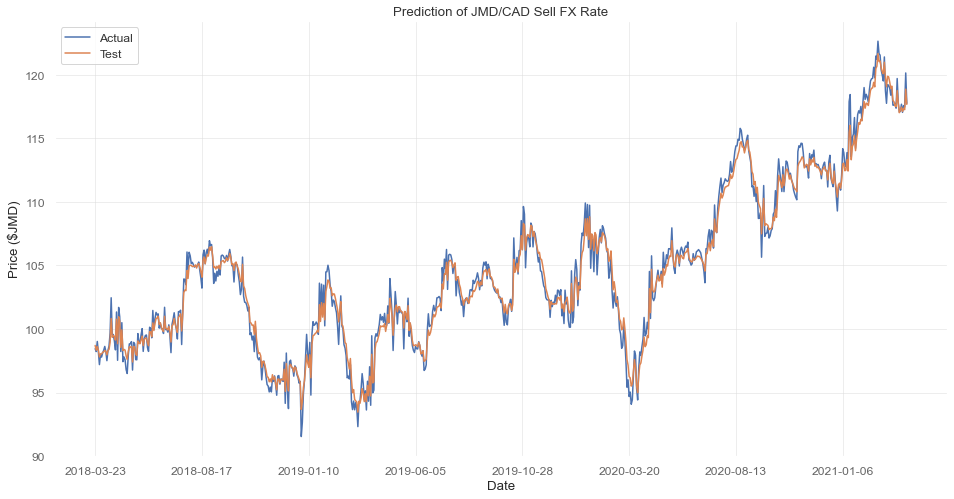

***********************************************
The accuracy of the JMD/CAD Sell model is: 0.99
***********************************************


In [10]:
predict_fx_sma(sma = 4)

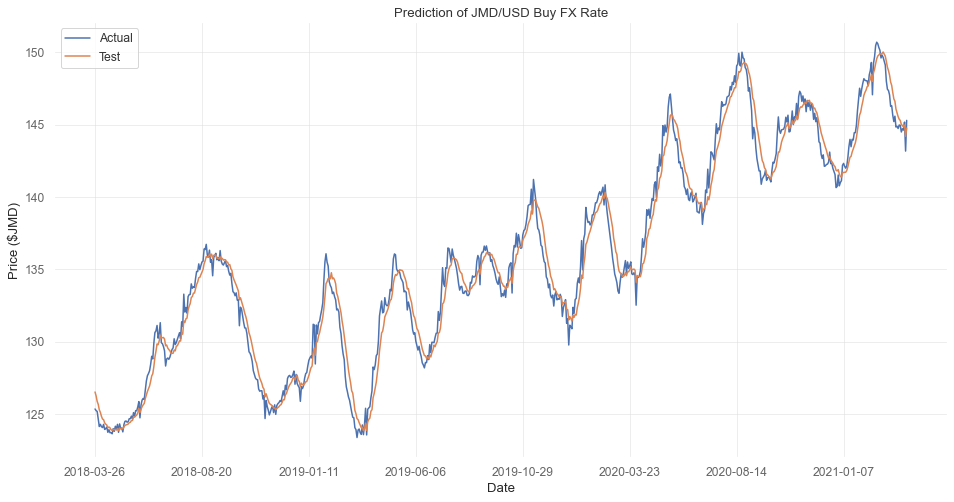

***********************************************
The accuracy of the JMD/USD Buy model is: 0.98
***********************************************


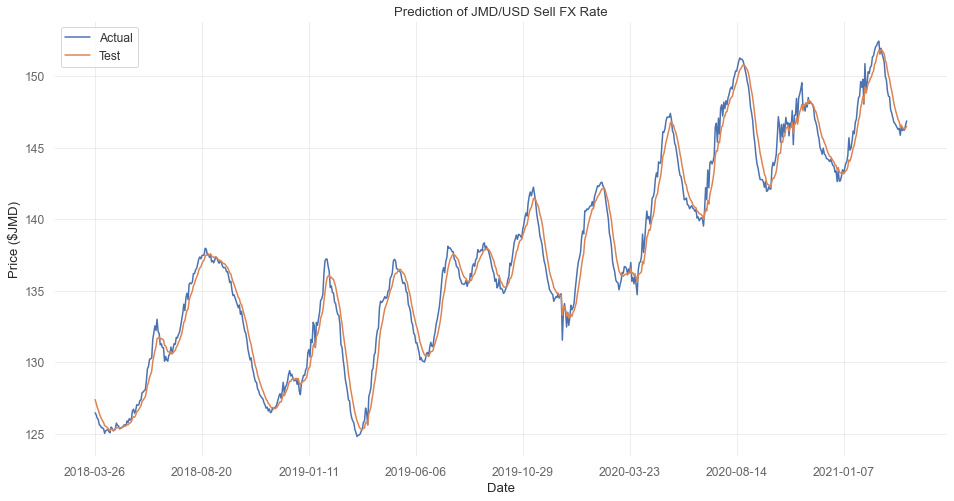

***********************************************
The accuracy of the JMD/USD Sell model is: 0.98
***********************************************


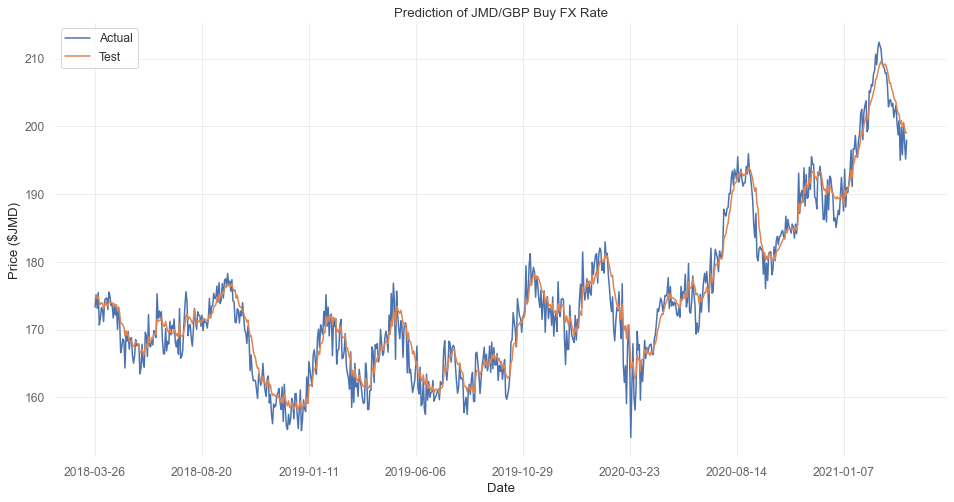

***********************************************
The accuracy of the JMD/GBP Buy model is: 0.96
***********************************************


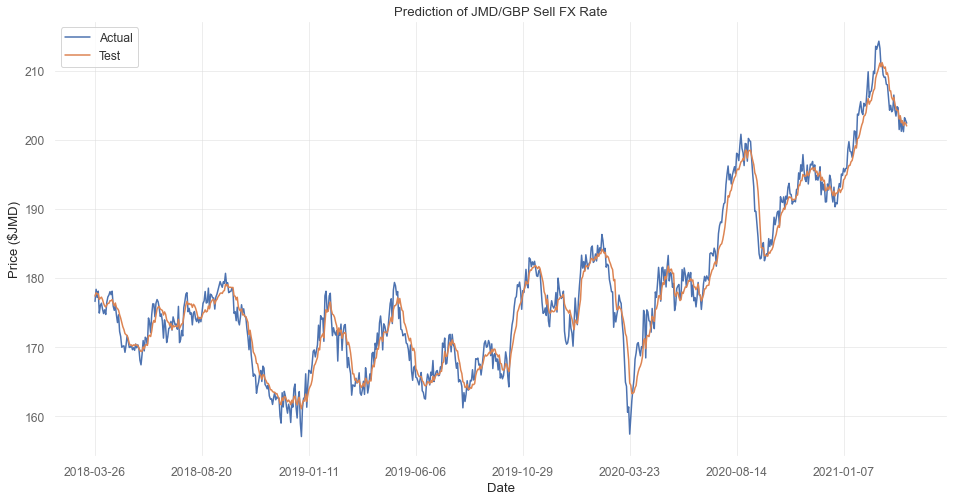

***********************************************
The accuracy of the JMD/GBP Sell model is: 0.97
***********************************************


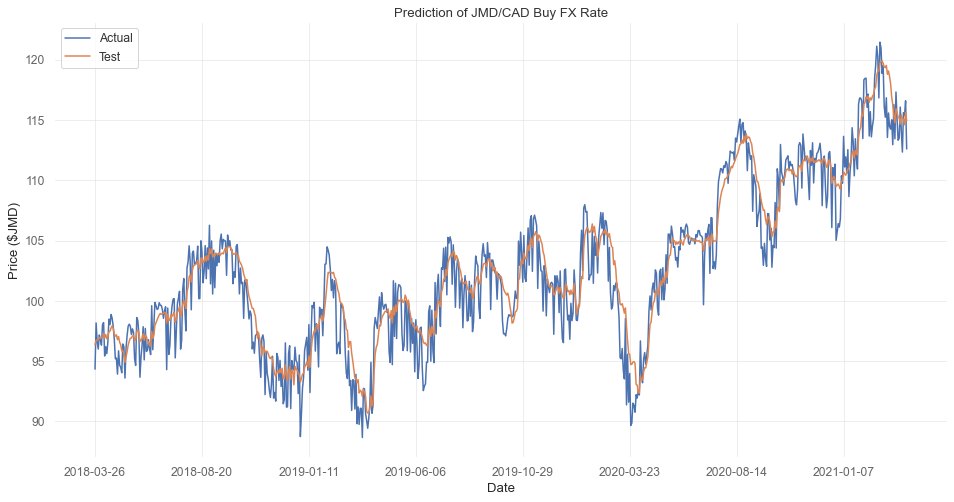

***********************************************
The accuracy of the JMD/CAD Buy model is: 0.92
***********************************************


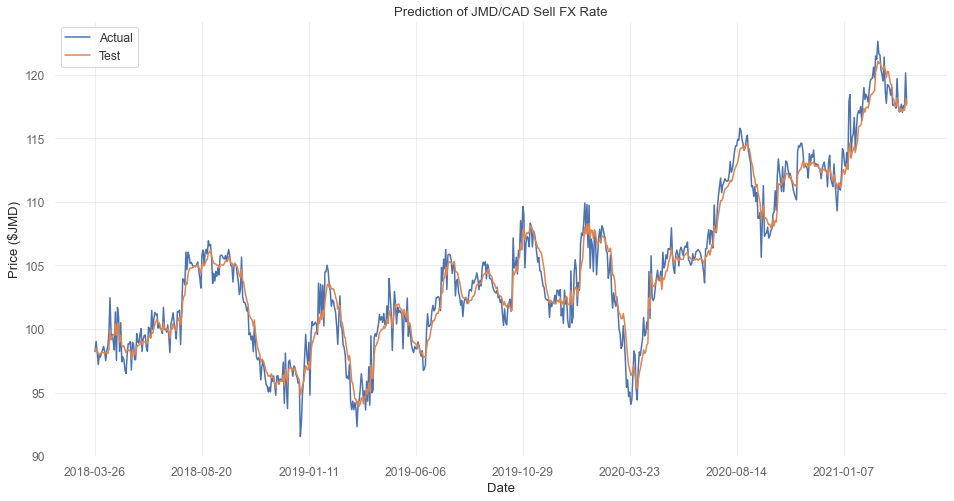

***********************************************
The accuracy of the JMD/CAD Sell model is: 0.97
***********************************************


In [3]:
predict_fx_sma(sma = 7)